In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 时隙Aloha算法冲突演示
# 初始参数
total_slots = 100
tag_count = 100
unit_time = 1
# 产生随机序列，序列长度=标签数
time_seq =  np.sort(np.random.randint(0,total_slots,size=tag_count))
print(time_seq)
# 冲突检测
# 产生冲突的时隙序列：collide_seq
# 产生冲突的时隙对应的冲突个数：collide_count_seq
i = 0
j = i + 1
flag = False
collide_count = 0
collide_seq = []
collide_count_seq = []
while j < len(time_seq):
    collide_count_per_slot = 0
    while j < len(time_seq) and time_seq[j] == time_seq[i] :
        j += 1
        collide_count += 1
        collide_count_per_slot += 1
        flag = True
    if flag:
        collide_count += 1
        collide_count_per_slot += 1
        collide_seq.append(time_seq[i])
        collide_count_seq.append(collide_count_per_slot)
        flag = False
        collide_count_per_slot = 0
    i = j
    j = i+1
collide_seq.sort()
# 可视化，设定画布比例
plt.figure(figsize=(15,3))
plt.title("slots:{},tags:{},collide:{},througput:{}".format(total_slots,tag_count,collide_count,(tag_count-collide_count)/total_slots),loc="center")
plt.bar(time_seq,1,width=unit_time)
plt.grid(b=True,axis="x")
plt.grid(b=True,axis="y")
plt.xlim(0,total_slots)
# 冲突的时隙标记为红色
plt.bar(collide_seq,collide_count_seq,color="red")
plt.show()
# print(time_seq)
# print(collide_seq)
# print(collide_count_seq)

[ 0  1  2  4  4  7  7  7  8  8  8  9  9 10 11 11 12 12 14 15 16 17 18 19
 19 20 20 22 22 24 28 29 29 29 29 31 32 35 35 35 35 38 41 41 42 43 47 48
 48 48 49 49 51 51 53 54 57 58 58 59 60 61 63 66 67 68 70 71 71 73 74 75
 77 78 78 80 82 83 85 85 85 85 86 86 87 88 88 89 89 89 90 90 91 93 93 94
 96 98 98 98]


<Figure size 1500x300 with 1 Axes>

199 199


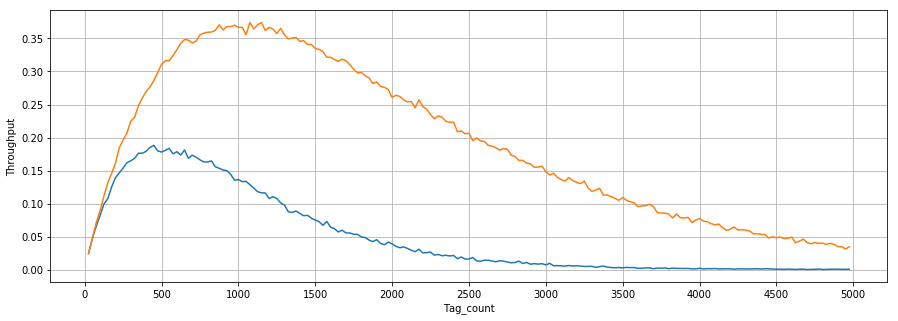

In [234]:

total_time = 1.0
unit_time = 0.001
utility_all = []
best_tag_count = int(total_time/unit_time/2)
max_tag_count = best_tag_count * 10
interval = max_tag_count // 200
min_tag_count = interval
tag_seq = range(min_tag_count,max_tag_count,interval)
for tag_count in tag_seq:
    utility = []
    for x in range(10):
        time_seq_all = np.sort(np.random.rand(tag_count))
        collide_count = 0
        i = 0
        j = i + 1
        flag = False
        while j < len(time_seq_all):
            while j < len(time_seq_all) and time_seq_all[j] < time_seq_all[j-1] + unit_time :
                j += 1
                collide_count += 1
                flag = True
            if flag:
                collide_count += 1
                flag = False
            i = j
            j = i+1
        collide_probility = collide_count*1.0/tag_count
        us = (tag_count - collide_count)*unit_time/total_time
        utility.append(us)
    utility_all.append(sum(utility)/len(utility))
plt.figure(figsize=(15,5))
plt.xlabel("Tag_count")
plt.ylabel("Throughput")
plt.xticks(np.linspace(0,max_tag_count,11))
plt.plot(tag_seq,utility_all)
plt.grid(b=True,axis="x")
plt.grid(b=True,axis="y")

utility_all = []
for tag_count in tag_seq:
    utility = []
    for x in range(10):
        time_seq_all = np.sort(np.random.randint(0,int(total_time/unit_time),size=tag_count))
        collide_count = 0
        i = 0
        j = i + 1
        flag = False
        while j < len(time_seq_all):
            while j < len(time_seq_all) and time_seq_all[j] == time_seq_all[i]:
                j += 1
                collide_count += 1
                flag = True
            if flag:
                collide_count += 1
                flag = False
            i = j
            j = i+1
        collide_probility = collide_count*1.0/tag_count
        us = (tag_count - collide_count)*unit_time/total_time
        utility.append(us)
    utility_all.append(sum(utility)/len(utility))
print(len(tag_seq),len(utility_all))
plt.plot(tag_seq,utility_all)

plt.show()

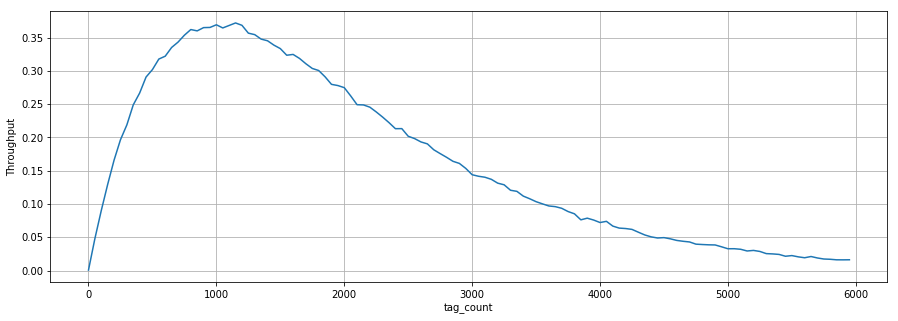

In [145]:
import numpy as np
import matplotlib.pyplot as plt
total_time = 1000
unit_time = 1
utility_all = []
for tag_count in range(1,6000,50):
    utility = []
    for x in range(20):
        msg_count_per_tag = 1
        time_seq_all = []
        time_seq_all = np.sort(np.random.randint(0,total_time,size=tag_count*msg_count_per_tag))
#         plt.bar(time_seq_all,1,width=unit_time)
#         plt.grid(b=True,axis="x")
#         plt.xlim(0,total_time)
#         plt.show()
        collide_count = 0
        i = 0
        j = i + 1
        flag = False
        while j < len(time_seq_all):
            while j < len(time_seq_all) and time_seq_all[j] == time_seq_all[i] :
                j += 1
                collide_count += 1
                flag = True
            if flag:
                collide_count += 1
                flag = False
            i = j
            j = i+1
        collide_probility = collide_count*1.0/tag_count
        us = (tag_count - collide_count)*unit_time*1.0/total_time
#         print(time_seq_all)
#         print("collide_count: {}, tag_count: {},probability: {}".format(collide_count,tag_count,collide_probility))
#         print("usage:", us)
        utility.append(us)
#     print(utility)
#     print(sum(utility)/len(utility))
    utility_all.append(sum(utility)/len(utility))
# print(utility_all)
plt.figure(figsize=(15,5))
plt.xlabel("tag_count")
plt.ylabel("Throughput")
plt.plot(range(1,6000,50),utility_all)
plt.grid(b=True,axis="x")
plt.grid(b=True,axis="y")
plt.show()

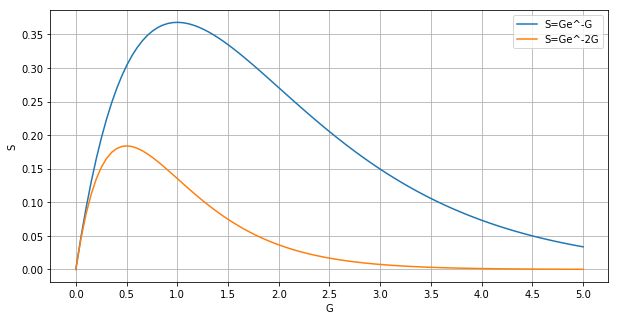

In [200]:
from math import e
x = np.linspace(0,5,100)
y = x*pow(e,-x)
y2 = x*pow(e,-2*x)
plt.figure(figsize=(10,5))
plt.xticks(np.linspace(-0.5,5.0,12))
plt.grid()
plt.xlabel('G')
plt.ylabel('S')
plt.plot(x,y,label="S=Ge^-G")
plt.plot(x,y2,label="S=Ge^-2G")
plt.legend(loc="upper right")
plt.show()

In [217]:
n = 100
print(pow(1-1/n,n-1))
print(1/e)

0.36972963764972644
0.36787944117144233


In [223]:
import random


class Aloha():
    '''
    Aloha network simulation.Each node tries to send into a single channel.
    It generates a message (becomes active) with probability q.
    Then it tries to send the message into the channel with probability p.
    If more than one nodes try to send, collision occurs resulting to failure,
    otherwise transmission is succesful.
    '''

    def __init__(self, nodes, p_send, q_generate, epochs):
        # number of nodes
        self.nodes = nodes

        # probability that an active node will send the generated message
        self.p_send = p_send

        # probability that a node will generate a message
        self.q_generate = q_generate

        # number of time steps to simulate
        self.epochs = epochs

        # list with the state of each node, initially all inactive
        self.states = [False] * self.nodes

        # list of current latencies for each node
        self.latencies = [0] * self.nodes

        # dictionary of nodes that keeps track of the total latency
        # that a node experienced in each interval that was latent.
        # It will be used to measure the average latency
        # for each node and total average latency.
        self.node_latencies = {i: [] for i in range(self.nodes)}

        # list of transmission outcomes. True for succes
        self.result = []

    def message_generation(self):
        '''
        Helper function to check message generation
        '''
        for i in range(len(self.states)):
            # need only to check for inactive nodes
            if not self.states[i]:
                if random.random() <= self.q_generate:
                    self.states[i] = True

    def transmission(self):
        senders = []
        actives = []

        # gather the indices of all active nodes
        actives = [i for i in range(len(self.states)) if self.states[i]]

        # check if an active node will try to send
        senders = [actv for actv in actives if random.random() <= self.p_send]

        # If more than one try to send we have a collision that results
        # in transmission failure
        if len(senders) > 1:
            self.result.append(False)
            # so any active node experiences latency
            for active in actives:
                self.latencies[active] += 1

        else:
            # If none wants to send then certainly we don't experience failure
            if not senders:
                self.result.append(True)
                # but we might experience latency
                for active in actives:
                    self.latencies[active] += 1
            else:
                # Success. Only one node tries to send
                self.states[senders[0]] = False
                # keep track of the possible latency the node has experienced
                self.node_latencies[senders[0]].append(self.latencies[senders[0]])                # the sender is not latent now
                self.latencies[senders[0]] = 0
                # all other active nodes experience latency again
                actives.remove(senders[0])
                for active in actives:
                    self.latencies[active] += 1
                self.result.append(True)

    def simulate(self):
            for i in range(self.epochs):
                self.message_generation()
                self.transmission()

    def comp_avg_node_latency(self):
        '''
        Method to compute the average node latency
        '''
        avg = 0

        # it is possible for a node not to experience latency at all
        # we omit such cases from computation
        for node in range(self.nodes):
            y = [value for value in self.node_latencies[node] if value]

            if y:
                avg += sum(y) / len(y)

        return avg / self.nodes

if __name__ == '__main__':
    '''
    Code to test the accuracy of the network (#succesful_transfers/#epochs)
    and latency for various values of p
    '''

    print('Exhibition:')
    x = Aloha(10, 0.1, 0.8, 25)
    x.simulate()
    print('Result: ' + str(x.result))
    print('Node latencies: ' + str(x.node_latencies))
    print('Average node latency: ' + str(x.comp_avg_node_latency()))

Exhibition:
Result: [False, True, False, False, True, True, True, True, False, True, True, True, True, True, False, False, True, False, True, True, True, True, False, True, True]
Node latencies: {0: [12, 5], 1: [20], 2: [4], 3: [], 4: [16], 5: [13], 6: [19, 3], 7: [], 8: [], 9: [23]}
Average node latency: 9.55


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


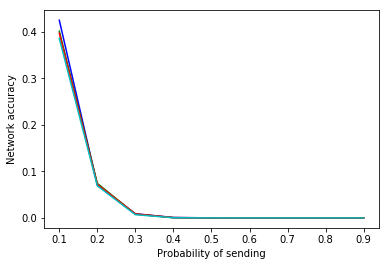

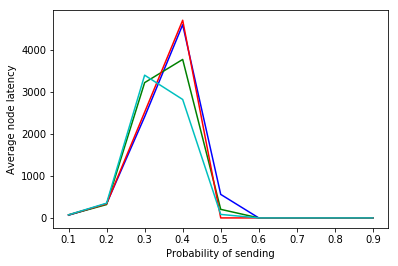

In [225]:
import matplotlib.pyplot as pl

# number of nodes
n = 20

# vector of message generation probabilities
q = [0.2, 0.4, 0.6, 0.8]

# number of epochs
e = 20000

# vector of probabilities of sending
p = [i / 100 for i in range(10, 100, 10)]

# list of lists that contain accuracy for each p
accuracies = [[], [], [], []]

# list of lists that contain average node latencies for each p
avg_node_latencies = [[], [], [], []]

# colors for line plotting
colors = ['b', 'g', 'r', 'c']

A = pl.figure(1)

# experiment will be conducted for various q values
# that will be represented with different line colors
for j in range(4):
    for i in p:
        x = Aloha(n, i, q[j], e)
        x.simulate()
        accuracies[j].append(x.result.count(True) / e)
        # print(x.node_latencies)
        avg_node_latencies[j].append(x.comp_avg_node_latency())
        # print(avg_node_latencies[j])
    pl.plot(p, accuracies[j], colors[j])


pl.xlabel('Probability of sending')
pl.ylabel('Network accuracy')
A.show()

L = pl.figure(2)

for j in range(4):
    pl.plot(p, avg_node_latencies[j], colors[j])

pl.xlabel('Probability of sending')
pl.ylabel('Average node latency')
pl.show()

In [226]:
[1,2,3]*5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]